## EDA - Day 4

### 데이터 전처리

#### 데이터셋 : NBA 2019 - 2020 시즌 선수별 평균

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

html = pd.read_html(url, header=0)
df_201920 = html[0]
df_201920.shape

(677, 30)

In [9]:
numeric_rows = df_201920['Rk'] != 'Rk'
df_201920 = df_201920[numeric_rows]
df_201920

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,0,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,525,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
673,526,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
674,527,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,...,0,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
675,528,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


- string 타입의 숫자들 to_numeric

In [13]:
for col in df_201920.columns:
    try:
        df_201920[col] = pd.to_numeric(df_201920[col])
    except ValueError:
        print(col)

Player
Pos
Tm


- 결측값 채우기

In [ ]:
df_201920.isnull().sum()

In [12]:
df_201920 = df_201920.fillna(0)
df_201920.isnull().sum()

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
eFG%      0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64

- True Shooting 지표 추가

In [14]:
TSA = df_201920['FGA'].astype('float') + 0.44 * df_201920['FTA'].astype('float')
df_201920['TS%'] = df_201920['PTS'] / (2 * TSA)

In [15]:
df_201920.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,0.605018
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,0.596310
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,0.569826
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,0.500000
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,0.470919


## 처리 완료한 DataFrame 저장

In [ ]:
df_201920.to_csv('nba_2020.csv', index=False)

In [4]:
pd.options.display.max_columns = 34

nba_19_20 = pd.read_csv('nba_2020.csv')
nba_19_20 = nba_19_20.drop('Rk', axis=1)
nba_19_20.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,0.605018
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,0.596310
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,0.569826
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,0.500000
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,0.470919


__- 시즌 중간에 팀을 이적한 선수 때문에 생긴 'Tm' == 'TOT' drop__

In [5]:
len(nba_19_20['Tm'].unique())
nba_19_20['Tm'].unique()

array(['OKC', 'MIA', 'SAS', 'NOP', 'MEM', 'BRK', 'NYK', 'ORL', 'HOU',
       'MIL', 'LAL', 'POR', 'TOR', 'CHI', 'TOT', 'SAC', 'PHO', 'CHO',
       'DAL', 'DEN', 'MIN', 'WAS', 'ATL', 'GSW', 'LAC', 'IND', 'UTA',
       'PHI', 'CLE', 'DET', 'BOS'], dtype=object)

In [6]:
player_bio_column = ['Player', 'Pos', 'Age', 'Tm', 'G', 'MP']
east = ['MIL', 'TOR', 'BOS', 'IND', 'MIA', 'PHI', 'BRK', 'ORL', 'CHO', 'WAS', 'CHI', 'NYK', 'DET', 'ATL', 'CLE']
west = ['LAL', 'LAC', 'DEN', 'HOU', 'OKC', 'UTA', 'DAL', 'POR', 'MEM', 'PHO', 'SAS', 'SAC', 'NOP', 'MIN', 'GSW']

In [7]:
print(len(east), len(west))

15 15


In [8]:
w = nba_19_20['Tm'].isin(west)
e = nba_19_20['Tm'].isin(east)

nba_19_20.loc[w, 'Conf'] = 'west'
nba_19_20.loc[e, 'Conf'] = 'east'

nba_19_20.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,Conf
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,0.605018,west
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,0.596310,east
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,0.569826,west
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,0.500000,east
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,0.470919,west


In [9]:
nba_19_20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  651 non-null    object 
 1   Pos     651 non-null    object 
 2   Age     651 non-null    int64  
 3   Tm      651 non-null    object 
 4   G       651 non-null    int64  
 5   GS      651 non-null    int64  
 6   MP      651 non-null    float64
 7   FG      651 non-null    float64
 8   FGA     651 non-null    float64
 9   FG%     651 non-null    float64
 10  3P      651 non-null    float64
 11  3PA     651 non-null    float64
 12  3P%     651 non-null    float64
 13  2P      651 non-null    float64
 14  2PA     651 non-null    float64
 15  2P%     651 non-null    float64
 16  eFG%    651 non-null    float64
 17  FT      651 non-null    float64
 18  FTA     651 non-null    float64
 19  FT%     651 non-null    float64
 20  ORB     651 non-null    float64
 21  DRB     651 non-null    float64
 22  TR

In [23]:
nba_19_20 = nba_19_20.dropna()

In [11]:
nba_19_20.describe(include=['O'])

,Player,Pos,Tm,Conf
count,589,589,589,589
unique,527,5,30,2
top,Anthony Tolliver,SG,BRK,west
freq,3,133,24,302


In [24]:
nba_19_20['ConfMap'] = 0
nba_19_20.loc[e, 'ConfMap'] = 1

In [25]:
nba_19_20.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,Conf,ConfMap
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,0.592,0.0,0.0,0.333,4.5,7.5,0.594,0.593,1.9,3.2,0.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9,0.605018,west,0
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,0.596310,east,1
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,0.493,1.2,3.0,0.389,6.2,12.0,0.519,0.532,3.0,3.6,0.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,0.569826,west,0
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,0.500000,east,1
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,0.368,1.0,2.8,0.346,1.1,2.8,0.391,0.455,0.5,0.8,0.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,0.470919,west,0


### 1. 사람들이 생각하는 것처럼 West Conf. > East Conf.를 증명해줄 Feature가 존재하는가?
### 2. 팀의 성적과 가장 유의미한 Feature?

In [22]:
conference = ['east', 'west']

PTS = nba_19_20[['Conf', 'PTS']]
PTS = PTS[PTS['Conf'].isin(conference)]

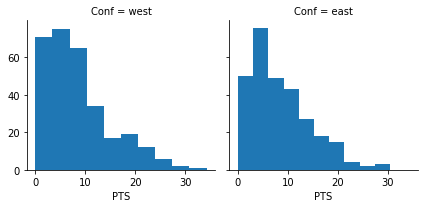

In [13]:
# PTS['PTS'].hist(by=PTS['Conf'])

g = sns.FacetGrid(PTS, col='Conf')
g.map(plt.hist, "PTS")

In [27]:
nba_19_20[['ConfMap', 'PTS']].corr()
# nba_19_20[['ConfMap', 'PTS']].groupby(['ConfMap'], as_index=False).mean().sort_values(by='PTS', ascending=False)

,ConfMap,PTS
ConfMap,1.000000,-0.003505
PTS,-0.003505,1.000000


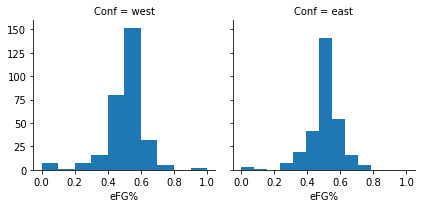

In [14]:
eFGp = nba_19_20[['Conf', 'eFG%']]
eFGp = eFGp[eFGp['Conf'].isin(conference)]

g = sns.FacetGrid(eFGp, col='Conf')
g.map(plt.hist, "eFG%")

In [28]:
nba_19_20[['ConfMap', 'eFG%']].corr()

,ConfMap,eFG%
ConfMap,1.000000,-0.002717
eFG%,-0.002717,1.000000


### 서부의 포인트가드(PG)와 스몰 포워드(SF)의 eFG%이 높음을 확인할 수 있습니다.
- 메인 볼 핸들러인 PG가 득점력이 좋음을 보여줍니다.
- 플레이오프에서 제일 중요한 포지션인 SF간의 차이는 유의미 해보입니다.

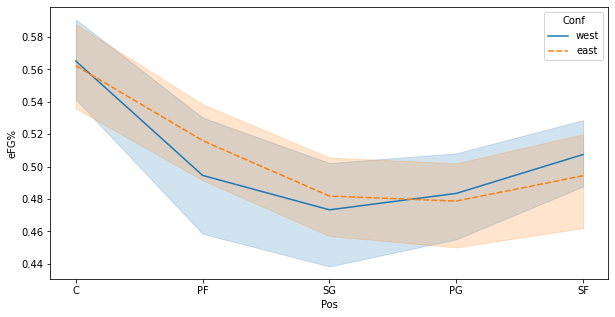

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Pos', y='eFG%', hue='Conf', style='Conf', data=nba_19_20.reset_index())
plt.show()

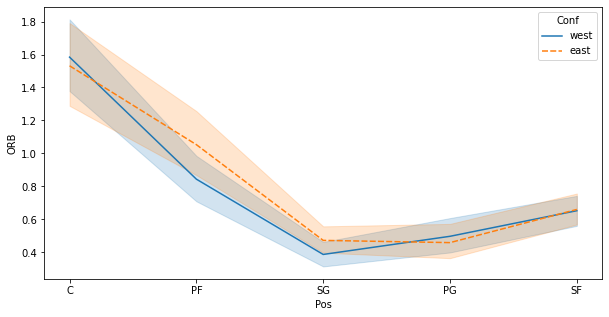

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Pos', y='ORB', hue='Conf', style='Conf', data=nba_19_20.reset_index())
plt.show()

### 서부의 수비 리바운드 상황에서 PG의 리바운드가 높습니다. 
- 속공 상황에서 더 빠른 공격전개가 가능하다는 의미 입니다.

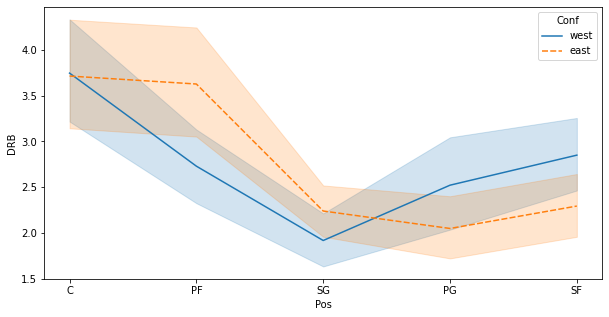

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Pos', y='DRB', hue='Conf', style='Conf', data=nba_19_20.reset_index())
plt.show()

In [57]:
cft = ['LAL', 'HOU', 'DEN', 'MIA', 'BOS', 'MIL']
d = {t: i + 1 for i, t in enumerate(cft)}
conf_final_teams = nba_19_20[:][nba_19_20['Tm'].isin(cft)]
conf_final_teams['RankPoint'] = conf_final_teams['Tm'].apply(lambda x: d[x])
conf_final_teams.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,TS%,Conf,ConfMap,RankPoint
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,0.557,0.0,0.2,0.143,6.1,10.8,0.564,0.558,3.7,5.3,0.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9,0.596310,east,1,4
3,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,0.500,0.0,0.0,0.000,0.5,1.0,0.500,0.500,0.0,0.0,0.000,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0,0.500000,east,1,4
11,Ryan Anderson,C,31,HOU,2,0,7.0,1.0,3.5,0.286,0.5,2.5,0.200,0.5,1.0,0.500,0.357,0.0,0.0,0.000,0.0,3.5,3.5,1.0,0.5,0.0,0.5,0.5,2.5,0.357143,west,0,2
12,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,0.553,1.4,4.7,0.304,9.5,15.0,0.631,0.589,6.3,10.0,0.633,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,0.612033,east,1,6
13,Kostas Antetokounmpo,PF,22,LAL,5,0,4.0,0.6,0.6,1.000,0.0,0.0,0.000,0.6,0.6,1.000,1.000,0.2,0.4,0.500,0.4,0.2,0.6,0.4,0.0,0.0,0.2,0.4,1.4,0.902062,west,0,1


<Figure size 720x360 with 0 Axes>

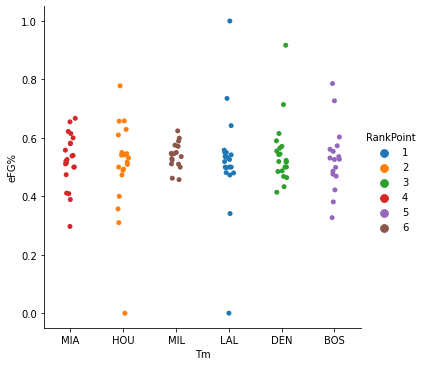

In [58]:
plt.figure(figsize=(10,5))
sns.catplot(x='Tm', y='eFG%', hue='RankPoint', data=conf_final_teams)

plt.show()

<Figure size 720x360 with 0 Axes>

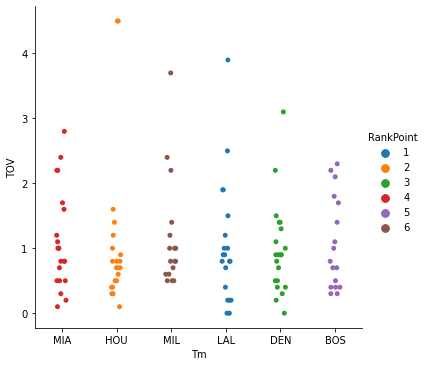

In [60]:
plt.figure(figsize=(10,5))
sns.catplot(x='Tm', y='TOV', hue='RankPoint', data=conf_final_teams)

plt.show()

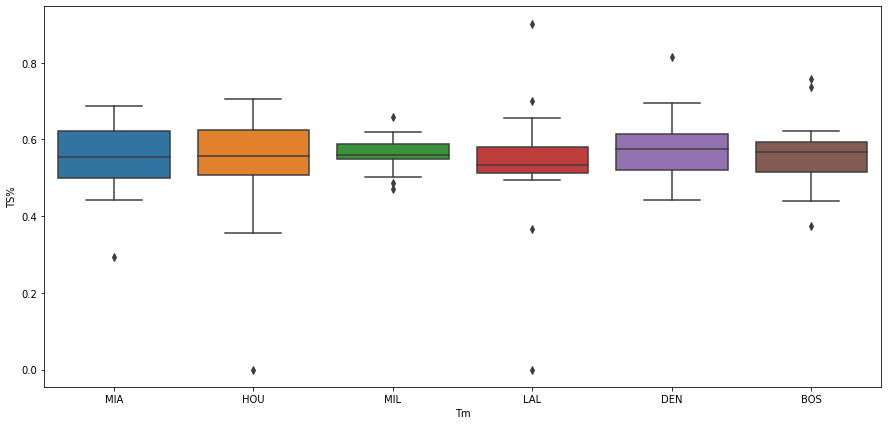

In [85]:
plt.figure(figsize=(15,7))
sns.boxplot(x='Tm', y='TS%', data=conf_final_teams)
plt.show()

In [86]:
conf_final_teams[['Tm', 'TOV', 'PTS', 'eFG%', 'FG', '3P', 'RankPoint']].groupby('Tm').mean().corr()

,TOV,PTS,eFG%,FG,3P,RankPoint
TOV,1.000000,0.869531,-0.205929,0.721332,0.779088,0.573162
PTS,0.869531,1.000000,-0.308313,0.889183,0.731690,0.592800
eFG%,-0.205929,-0.308313,1.000000,-0.096350,-0.488519,0.501058
FG,0.721332,0.889183,-0.096350,1.000000,0.348718,0.548720
3P,0.779088,0.731690,-0.488519,0.348718,1.000000,0.367175
RankPoint,0.573162,0.592800,0.501058,0.548720,0.367175,1.000000


In [92]:
cf = conf_final_teams[['Tm', 'TOV', 'PTS', 'eFG%', 'FG', '3P', 'RankPoint']].groupby('Tm').mean()
cf.sort_values(by='3P', ascending=False)

,TOV,PTS,eFG%,FG,3P,RankPoint
Tm,,,,,,
HOU,1.080952,8.700000,0.506381,3.076190,1.128571,2
MIA,1.114286,8.380952,0.524190,2.966667,1.095238,4
MIL,1.158824,9.029412,0.539588,3.305882,1.052941,6
BOS,1.064706,8.747059,0.528471,3.223529,0.923529,5
DEN,0.971429,7.571429,0.544905,2.819048,0.790476,3
LAL,1.040000,8.035000,0.523200,3.065000,0.780000,1


### 의미 있는 Feature를 얻지 못한 시도들

In [30]:
nba_team = nba_19_20.groupby('Tm').mean()
col_mean = ['FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%']
percents = pd.DataFrame(nba_team, columns=col_mean)

nba_team = nba_19_20.groupby('Tm').sum()
for col in col_mean:
    nba_team[col] = percents[col]
nba_team['G'] = nba_team['G'] / 74
nba_team['MP'] = nba_team['MP'] / nba_team['G']
nba_team.drop(['GS'], axis=1, inplace=True)
nba_team['Roster'] = nba_19_20.groupby('Tm').count()['G']
nba_team['Age'] = nba_team['Age'] / nba_team['Roster']

e = nba_team.index.isin(east[:10])
east_conf = nba_team[e]
east_conf['Rank'] = pd.Series({tm: 100 - idx * 4 for idx, tm in enumerate(east)})

w = nba_team.index.isin(west[:10])
west_conf = nba_team[w]
west_conf['Rank'] = pd.Series({tm: 100 - idx * 4 for idx, tm in enumerate(west)})
# a = nba_team.isin(['Tm', 'FG%', '3P%', '2P%', 'eFG%', 'FT%', 'TS%'], axis=1)
a = nba_team.columns.isin(col_mean)

<ipython-input-30-b62a119d6a0d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  east_conf['Rank'] = pd.Series({tm: 100 - idx * 4 for idx, tm in enumerate(east)})
<ipython-input-30-b62a119d6a0d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  west_conf['Rank'] = pd.Series({tm: 100 - idx * 4 for idx, tm in enumerate(west)})


In [100]:
col_light_a = ['ORB', 'DRB', 'TOV', 'PF', 'Rank']
col_light_b = ['FG', '3P', 'FT', 'Rank']

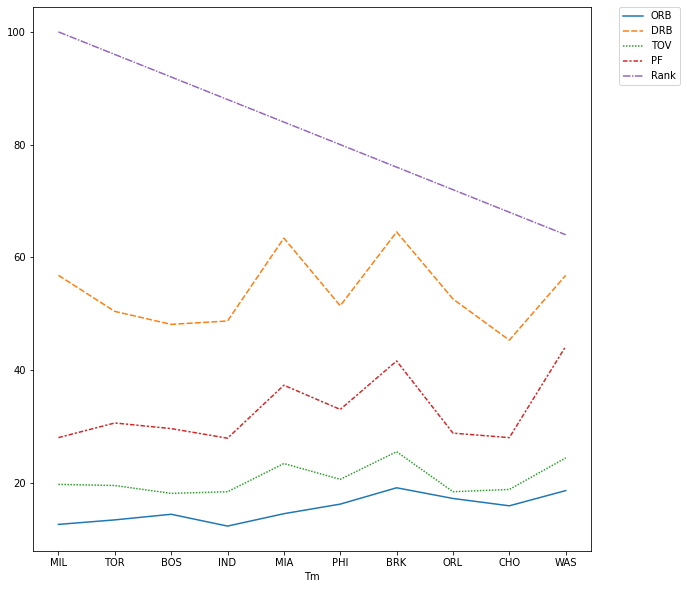

In [102]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=east_conf[:][col_light_a])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

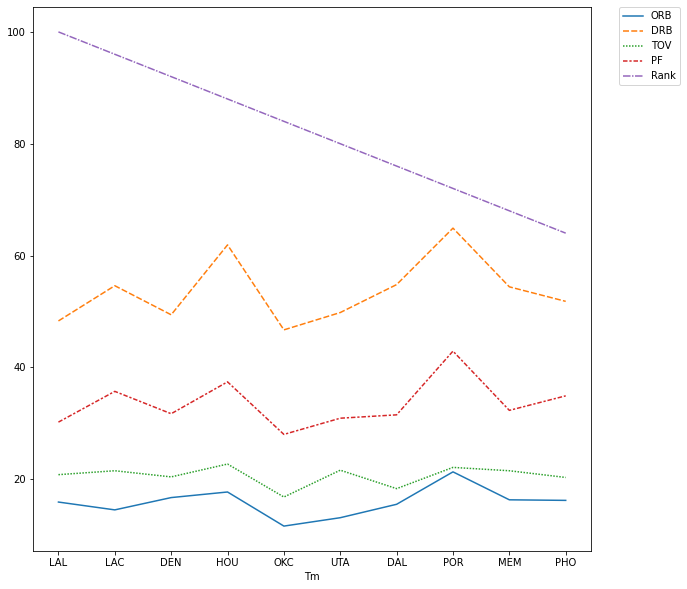

In [105]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=west_conf[:][col_light_a])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

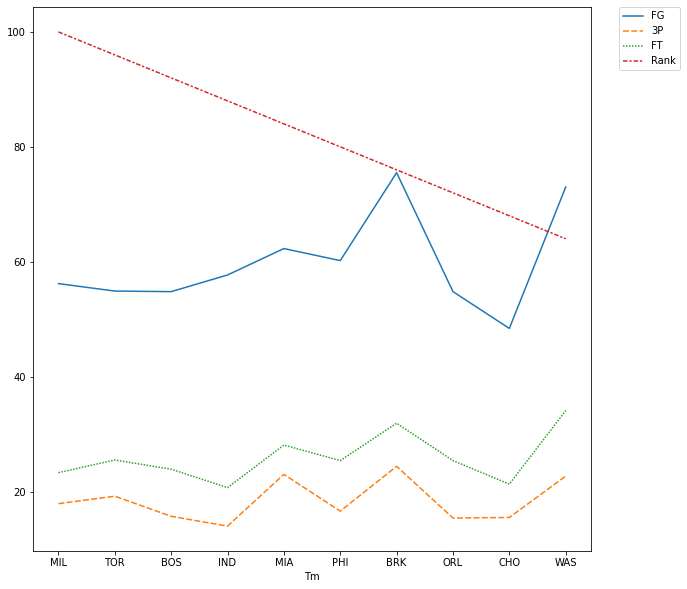

In [104]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=east_conf[:][col_light_b])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

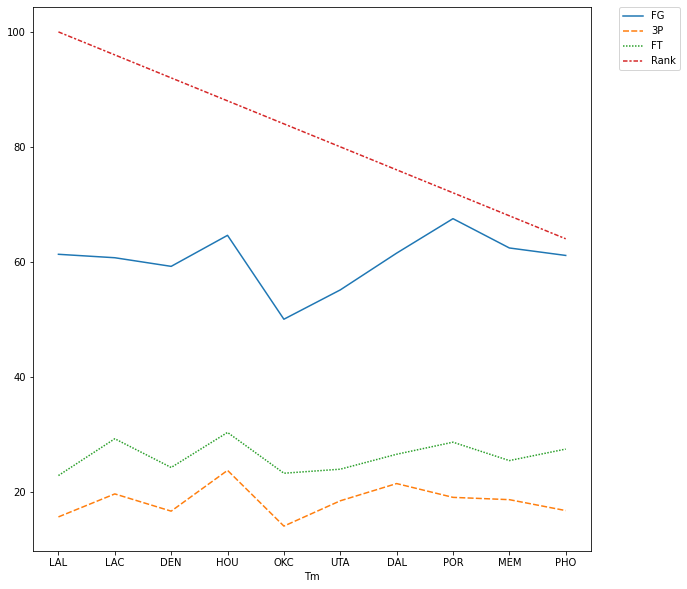

In [106]:
plt.figure(figsize=(10, 10))
sns.lineplot(data=west_conf[:][col_light_b])
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

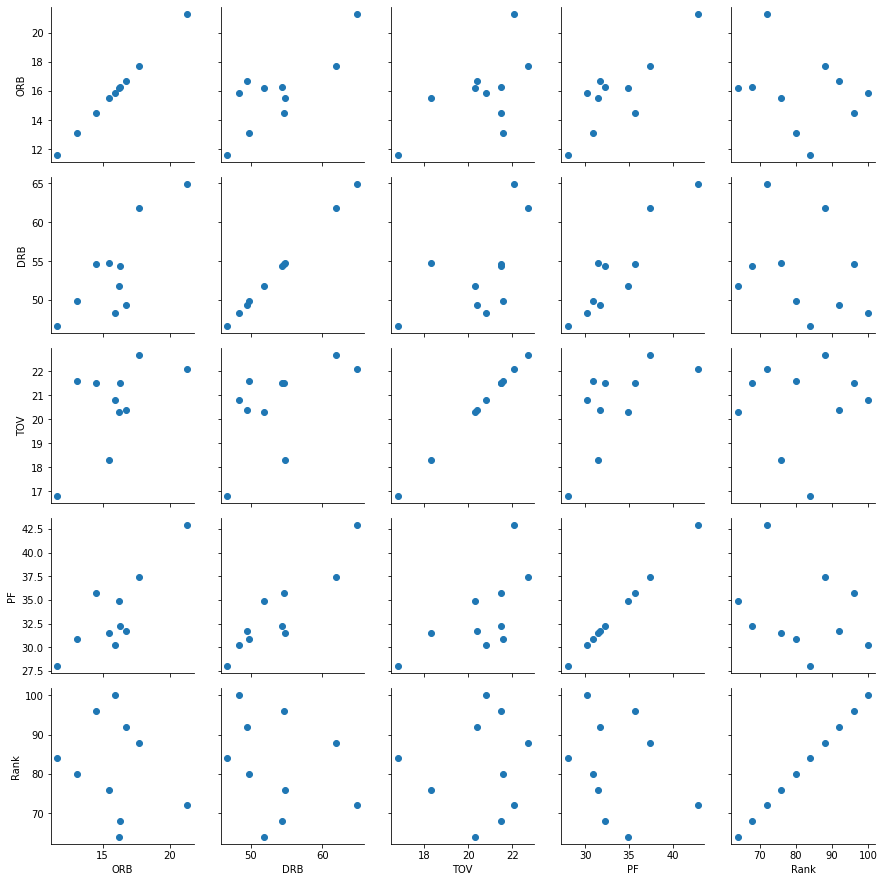

In [107]:
col_light_a = ['ORB', 'DRB', 'TOV', 'PF', 'Rank']
col_light_b = ['FG', '3P', 'FT', 'eFG%', 'TS%', 'Rank']
wc_light = west_conf.loc[:][col_light_a]
g = sns.PairGrid(wc_light)
g.map(plt.scatter)

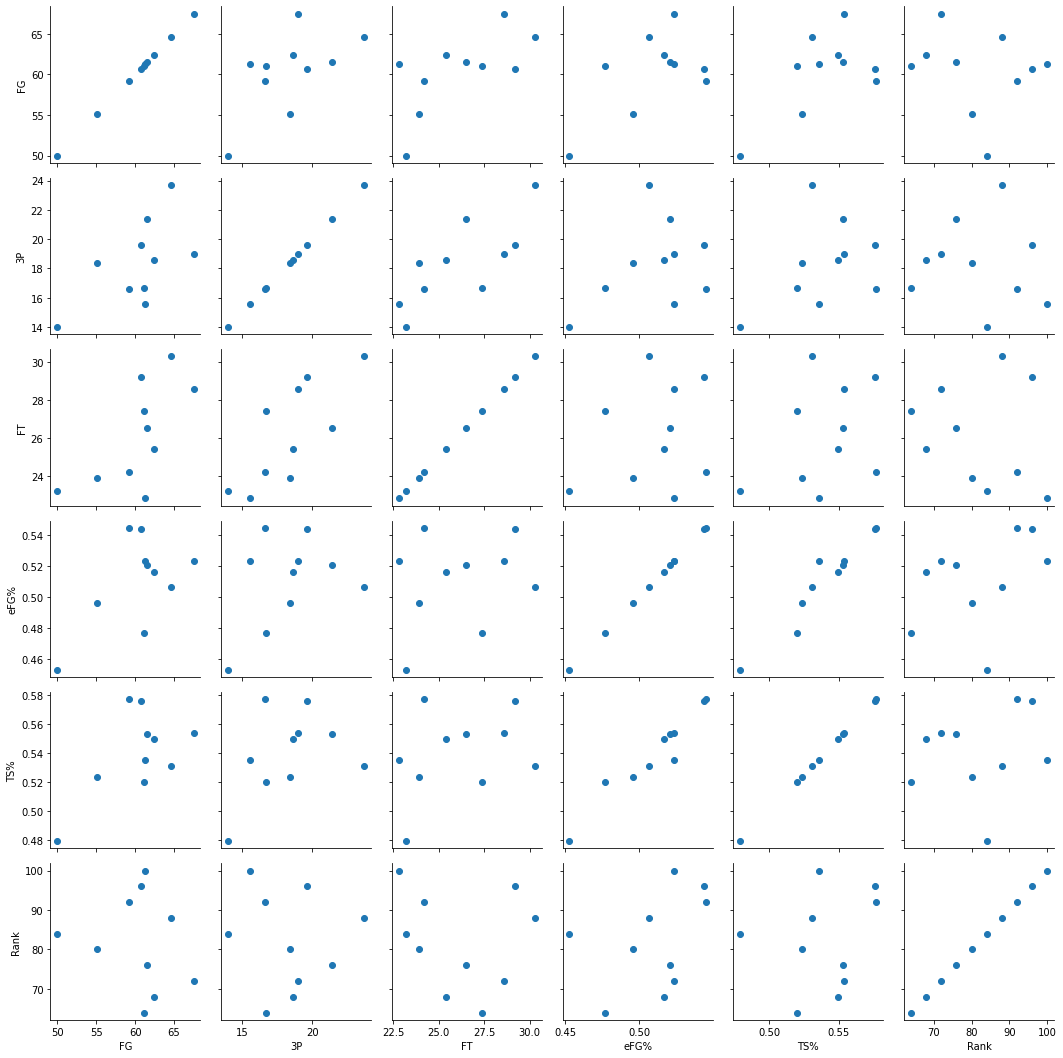

In [108]:
wc_light = west_conf.loc[:][col_light_b]
g = sns.PairGrid(wc_light)
g.map(plt.scatter)